# Author : Aravinth.S

## Data Science and Business Analytics Tasks

## The Sparks Foundation : Graduate Rotational Internship Program (GRIP) June 2021 Batch

## Task 4 : Exploratory Data Analysis(Global Terrorism)

## Problem Statement : As a security/defense analyst, try to find out the hot zone of terrorism.  
## What all security issues and insights you can derive by EDA? 

##### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

##### Loading dataset

In [2]:
df = pd.read_csv('global_terr.csv',encoding='ISO-8859-1')

In [3]:
pd.set_option('display.max_columns',None)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [8]:
df.shape

(181691, 135)

In [9]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

##### Rename columns

In [4]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

##### Drop useless columns

In [6]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [8]:
df.shape

(181691, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [19]:
df.head(5).T

,0,1,2,3,4
Year,1970,1970,1970,1970,1970
Month,7,0,1,1,1
Day,2,0,0,0,0
Country,Dominican Republic,Mexico,Philippines,Greece,Japan
state,NaN,Federal,Tarlac,Attica,Fukouka
Region,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia
city,Santo Domingo,Mexico city,Unknown,Athens,Fukouka
latitude,18.4568,19.3719,15.4786,37.9975,33.5804
longitude,-69.9512,-99.0866,120.6,23.7627,130.396
AttackType,Assassination,Hostage Taking (Kidnapping),Assassination,Bombing/Explosion,Facility/Infrastructure Attack


##### Any Missing Values??

In [22]:
df.isnull().sum()/len(df) *100

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
state           0.231712
Region          0.000000
city            0.238867
latitude        2.507554
longitude       2.508104
AttackType      0.000000
Killed          5.676120
Wounded         8.977330
Target          0.350045
Summary        36.396409
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
Motive         72.171984
dtype: float64

In [23]:
df=df.drop(['Motive','Summary'],axis =1)

In [24]:
df.shape

(181691, 16)

#### Exploratory Data Analysis

##### 1.Country

##### Top Countries affected by Terror Attacks

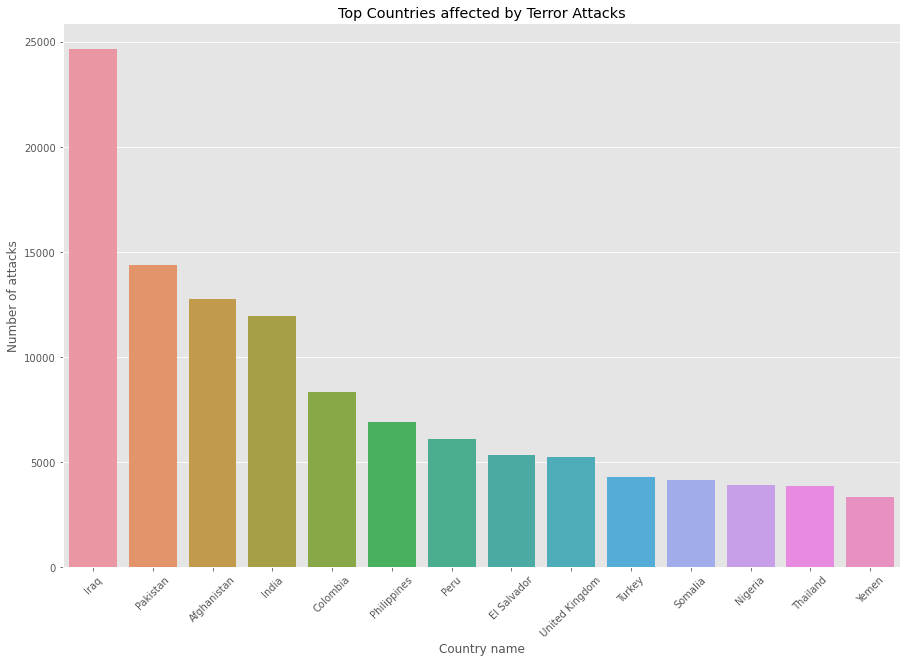

In [26]:
plt.figure(figsize=(15,10))
country = df['Country'].value_counts().reset_index()
sns.barplot(x='index', y='Country', data =country[:14])
plt.title('Top Countries affected by Terror Attacks')
plt.xlabel('Country name')
plt.ylabel('Number of attacks')
plt.xticks(rotation=45)
plt.show()

##### 2.City

##### Top Cities affected by Terror Attacks

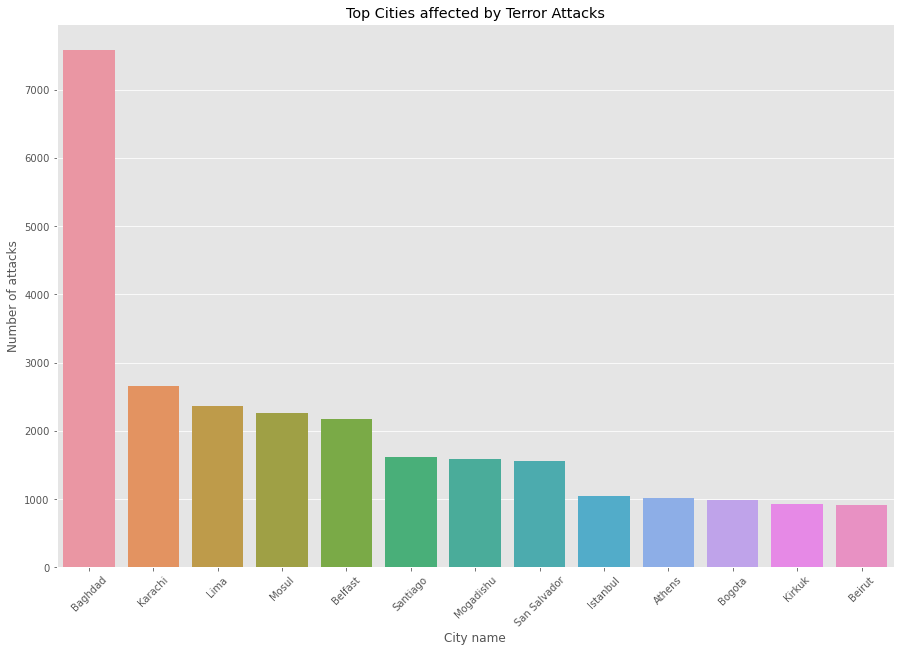

In [27]:
city = df['city'].value_counts().reset_index()
plt.figure(figsize=(15,10))

sns.barplot(x='index', y='city', data =city[1:14])
plt.title('Top Cities affected by Terror Attacks')
plt.xlabel('City name')
plt.ylabel('Number of attacks')
plt.xticks(rotation=45)
plt.show()

##### 3.Region

##### Terrorist Activities by Region

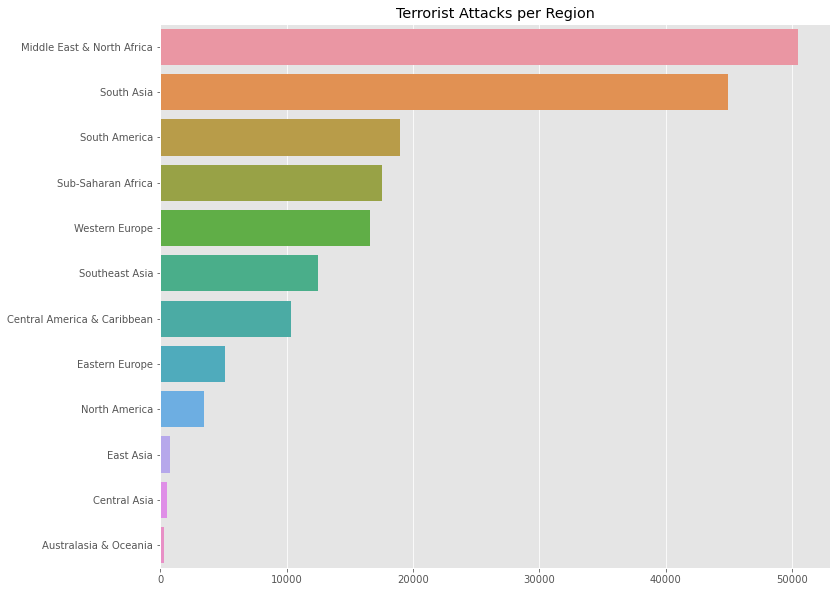

In [28]:
plt.figure(figsize = (12,10))
sns.barplot(x=df['Region'].value_counts().values, y=df['Region'].value_counts().index)
plt.title('Terrorist Attacks per Region')
plt.show()

##### Terrorist Activities by Region year wise

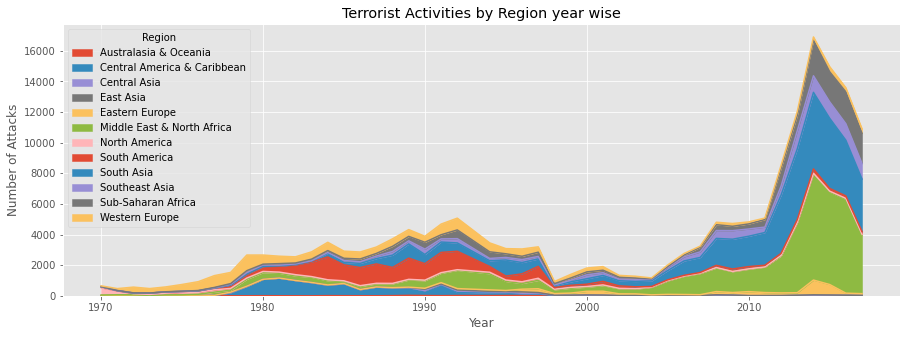

In [29]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,5))
plt.title('Terrorist Activities by Region year wise')
plt.ylabel('Number of Attacks')
plt.show()

#### 4. Year

##### Terrorist Attacks in each Year

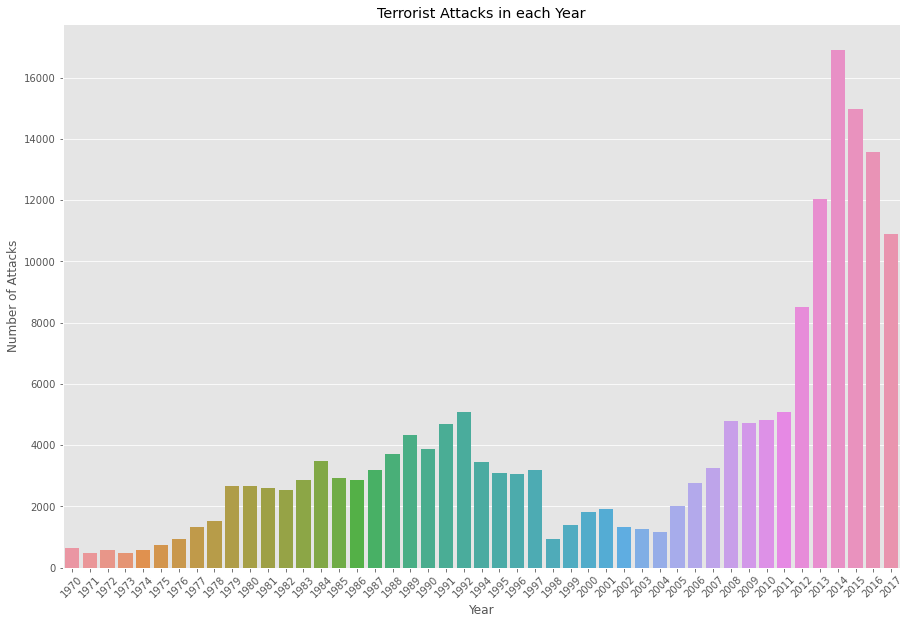

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(df['Year'])
plt.xticks(rotation =45)
plt.title('Terrorist Attacks in each Year')
plt.ylabel('Number of Attacks')
# plt.grid()
plt.show()

##### 5.People were killed in a Terrorist Attack

##### Peoples were killed in a Terrorist Attack in each Year

In [35]:
killed=df.groupby('Year').sum()['Killed'].reset_index()
year=df.groupby('Year').size()
year=pd.DataFrame({'Attack': year}) 
year = year.reset_index()
killed= killed.drop(['Year'], axis=1)
new_year=pd.concat([year,killed],axis=1)

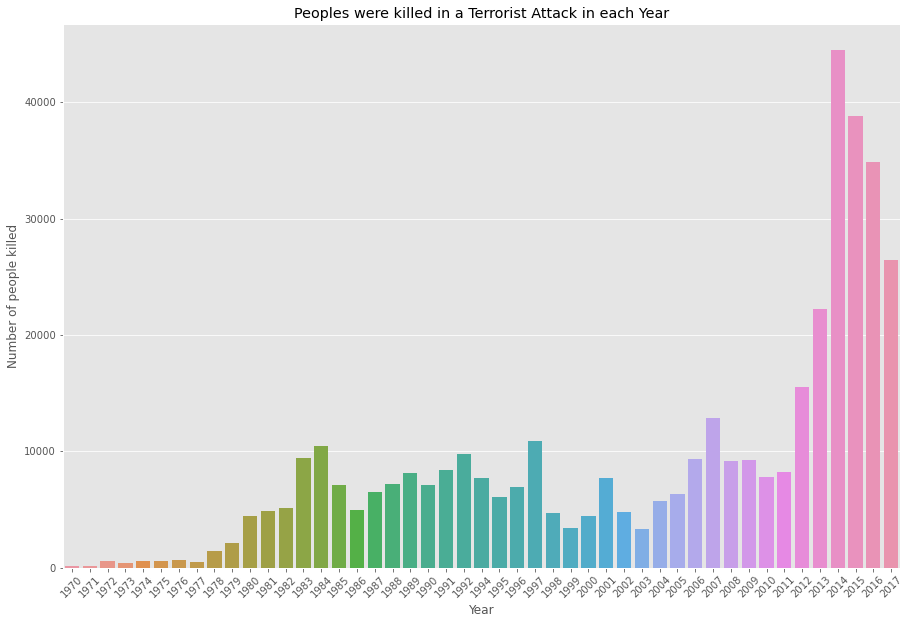

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(data = new_year, x='Year', y='Killed')
plt.xticks(rotation =45)
plt.title('Peoples were killed in a Terrorist Attack in each Year')
plt.ylabel('Number of people killed')
plt.xlabel('Year')
plt.show()

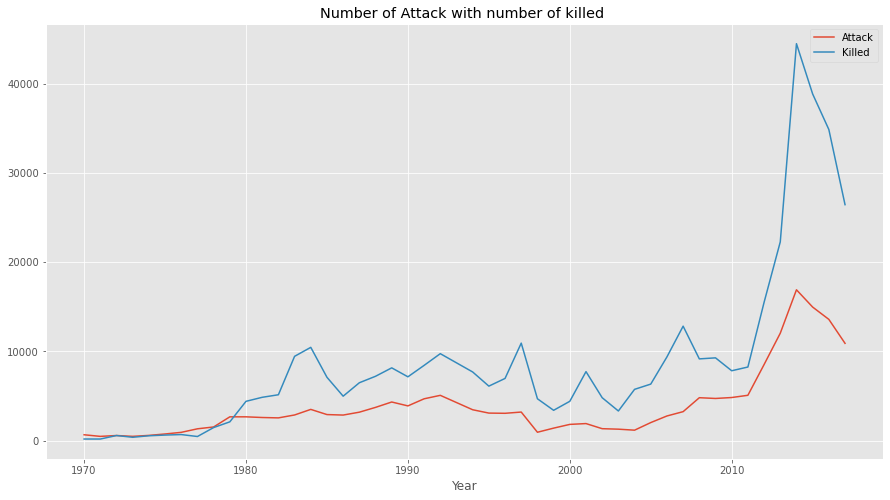

In [28]:
new_year.plot(x='Year',figsize=(15, 8))
plt.title('Number of Attack with number of killed ')
plt.show()

##### 6. Different types of Attack_Type

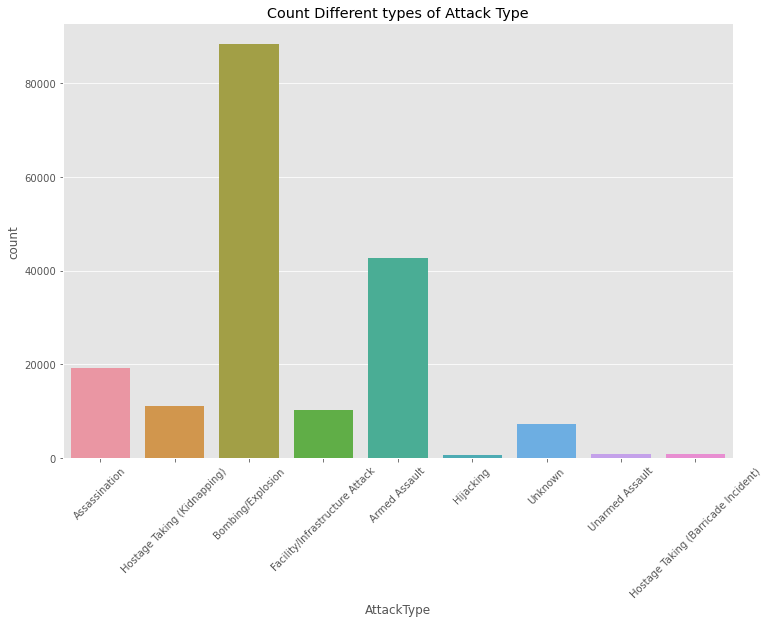

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(df['AttackType'])
plt.title('Count Different types of Attack Type')
plt.xticks(rotation =45)
plt.show()

##### 7.Different Types of Target

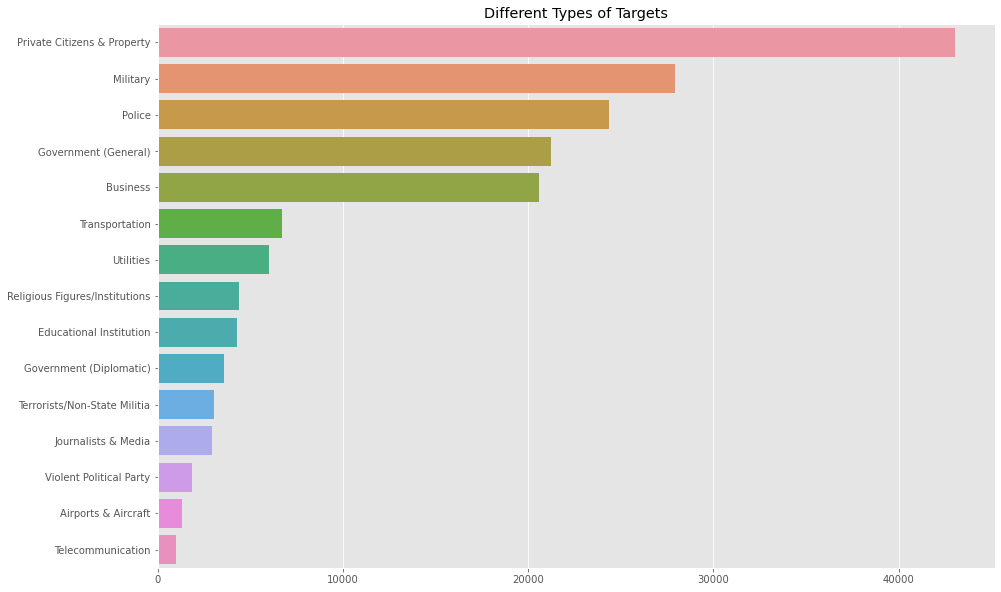

In [40]:
plt.figure(figsize=(15,10))
new_df = df[df['Target']!='Unknown']
sns.barplot(y=new_df['Target_type'].value_counts()[:15].index,x=new_df['Target_type'].value_counts()[:15].values)
plt.title('Different Types of Targets')
plt.show()

##### 8. Terrorist Organizations

#####  Most Active Terrorist Organizations

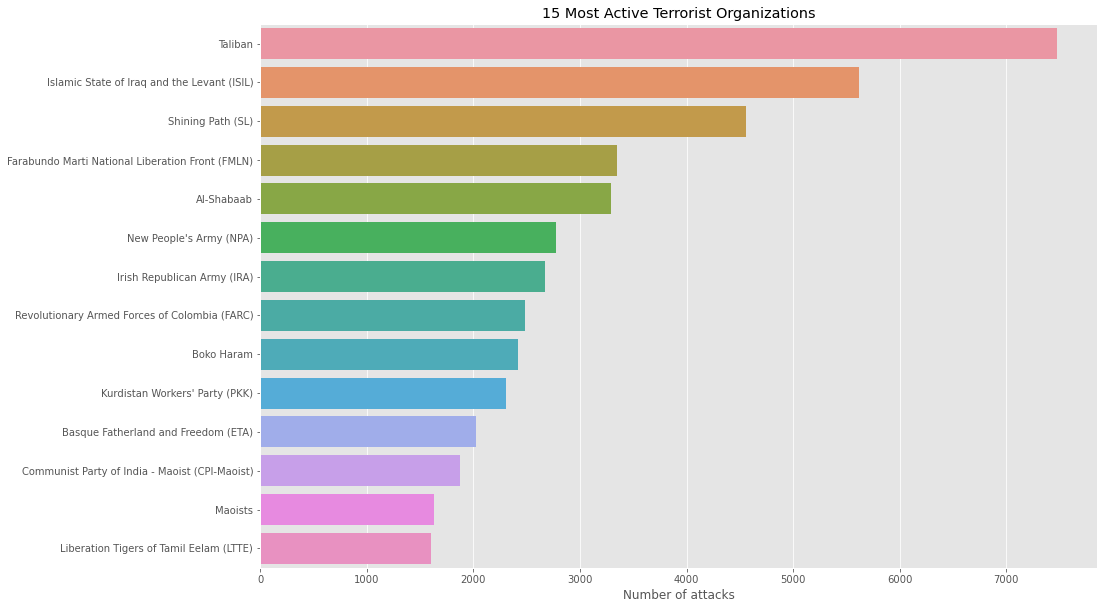

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(y=df['Group'].value_counts()[1:15].index,x=df['Group'].value_counts()[1:15].values)
plt.title('15 Most Active Terrorist Organizations')
plt.xlabel('Number of attacks')
plt.show()

#### Conclusion

##### 1. Top 3 Countries affected by Terror Attacks:

#####   1)Iraq

#####   2)Pakistan 

#####   3)Afghanistan    

##### 2. Top 3 Cities affected by Terror Attacks:

#####   1)Baghdad  

#####   2)Karachi 

#####   3)Lima  

##### 3. Top 3 Regions affected by Terror Attacks:

#####   1)Middle East & North Africa   
    
#####   2)South Asia 

#####   3)South America 

##### 4. Most number of terror attack : Year 2014

##### 5. Major Target Type

#####   1)Private Citizens & Property
    
#####   2)Military

#####   3)Police

##### 6. Most Active Terrorist Organizations

#####   1)Taliban
    
#####   2)Islamic State of Iraq and the Levant (ISIL)

#####   3)Shining Path (SL) 

# --------------------------------------THANK YOU----------------------------------------